Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## Importing modules

In [6]:
#Importing all the model Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
## Loading the dataset

In [8]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# To display all columns 
pd.set_option('display.max_columns', None)

In [10]:
# information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 614 rows and 13columns

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that there are categorical colums and numerical columns in our dataset so to make a model we will have to separate the categorical columns and numerical columns.

In [12]:
categorical_columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
print("Categorical Columns:- ",categorical_columns)
print("Numerical Columns:- ",numerical_columns)

Categorical Columns:-  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Columns:-  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [13]:
df.shape

(614, 13)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

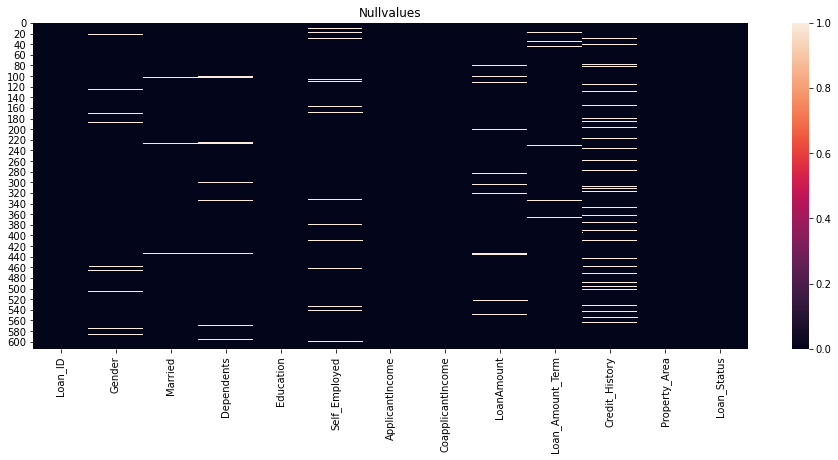

In [15]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

By observing there are null values

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status'].unique()

array([1, 0])

Converting target variable in to  numerrical by label encoder

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


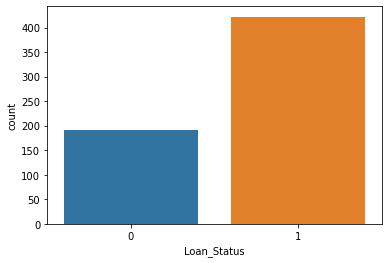

In [19]:
sns.countplot(df['Loan_Status'])
plt.show()

Loan of Maximum People are approved.

We can see that there is not much of a Class Imbalance and will not effect model working so we will not do anything.

# Treating Null Values:-

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

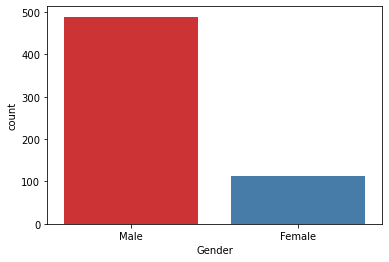

Percent of missing "Gender" records is 2.12%


In [23]:
sns.countplot(df['Gender'],palette='Set1')
plt.show()
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

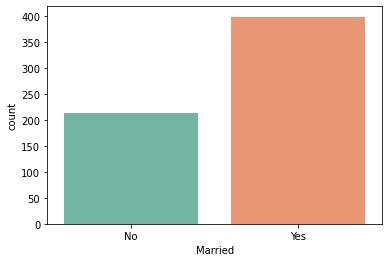

Percent of missing "Married" records is 0.49%


In [24]:
sns.countplot(df['Married'],palette='Set2')
plt.show()
print('Percent of missing "Married" records is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))

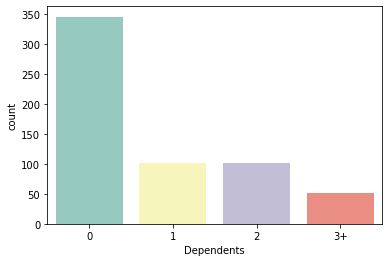

Percent of missing "Dependents" records is 2.44%


In [25]:
sns.countplot(df['Dependents'],palette='Set3')
plt.show()
print('Percent of missing "Dependents" records is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))

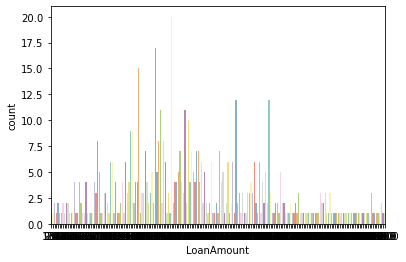

Percent of missing "Dependents" records is 3.58%


In [26]:
sns.countplot(df['LoanAmount'],palette='Set3')
plt.show()
print('Percent of missing "Dependents" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

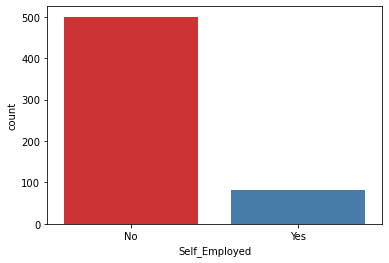

Percent of missing "Self_Employed" records is 5.21%


In [27]:
sns.countplot(df['Self_Employed'],palette='Set1')
plt.show()
print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))

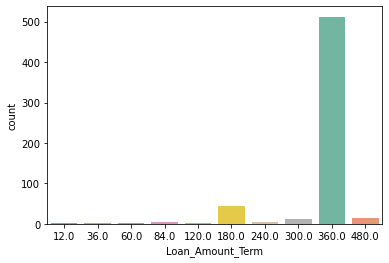

Percent of missing "Loan_Amount_Term" records is 2.28%


In [28]:
sns.countplot(df['Loan_Amount_Term'],palette='Set2')
plt.show()
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))

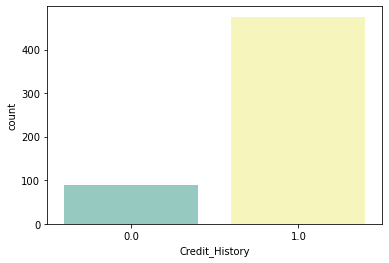

Percent of missing "Credit_History" records is 8.14%


In [29]:
sns.countplot(df['Credit_History'],palette='Set3')
plt.show()
print('Percent of missing "Credit_History" records is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))

By replacing null values with fillna method and idxmax

In [30]:
df_new= df.copy()
df_new['Gender'].fillna(df_new['Gender'].value_counts().idxmax(), inplace=True)
df_new['Married'].fillna(df_new['Married'].value_counts().idxmax(), inplace=True)
df_new['Dependents'].fillna(df_new['Dependents'].value_counts().idxmax(), inplace=True)
df_new['Self_Employed'].fillna(df_new['Self_Employed'].value_counts().idxmax(), inplace=True)
df_new["LoanAmount"].fillna(df_new["LoanAmount"].mean(skipna=True), inplace=True)
df_new['Loan_Amount_Term'].fillna(df_new['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
df_new['Credit_History'].fillna(df_new['Credit_History'].value_counts().idxmax(), inplace=True)

In [31]:
df_new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All null values are treated

In [32]:
df_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [33]:
df_new.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

Replacing the column values to numerical

In [34]:
df_new['Gender'] = df_new['Gender'].replace({'Female':0,'Male':1})
df_new['Married'] = df_new['Married'].replace({'No':0,'Yes':1})
df_new['Dependents'] = df_new['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
df_new['Education'] = df_new['Education'].replace({'Not Graduate':0,'Graduate':1})
df_new['Self_Employed'] = df_new['Self_Employed'].replace({'No':0,'Yes':1})
df_new['Property_Area'] = df_new['Property_Area'].replace({'Semiurban':0,'Urban':1,'Rural':2})
df_new.drop('Loan_ID',axis=1,inplace=True)

In [36]:
df_new.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int32
dtype: object

In [37]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [38]:
corr=df_new.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,0.109521,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,-0.007281,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.001601,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.073928,0.073658,-0.066740,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,0.007124,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.017321,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.019087,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,0.029024,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.016086,-0.022549
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,-0.033102,0.540556


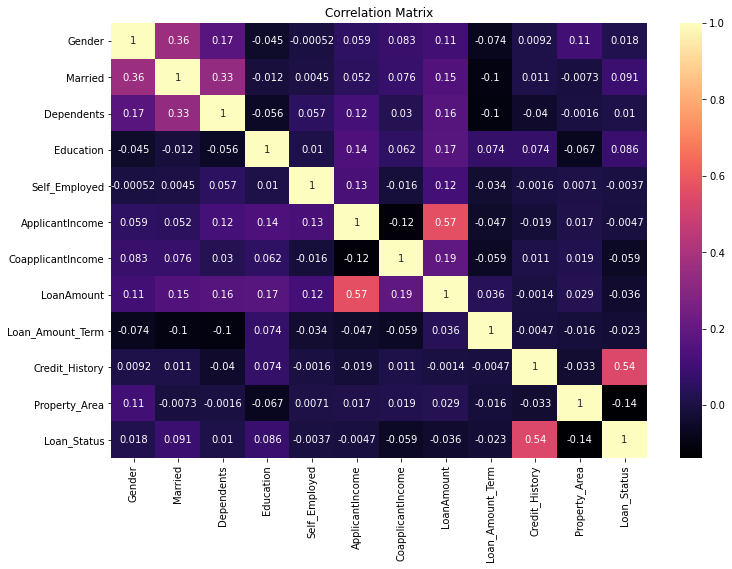

In [39]:
plt.figure(figsize=(12,8))
plt.title("Correlation Matrix")
sns.heatmap(corr,annot=True,cmap='magma')
plt.show()

loan_status is negtively correlated with propertt_area and coapplicant income

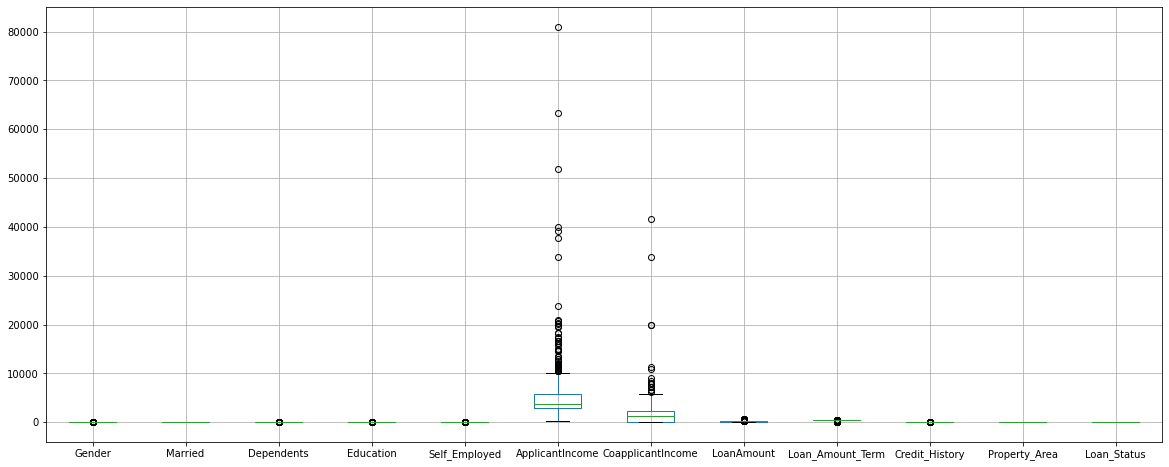

In [40]:
df_new.boxplot(figsize=(20,8))
plt.show()

outliers are present but data is small 

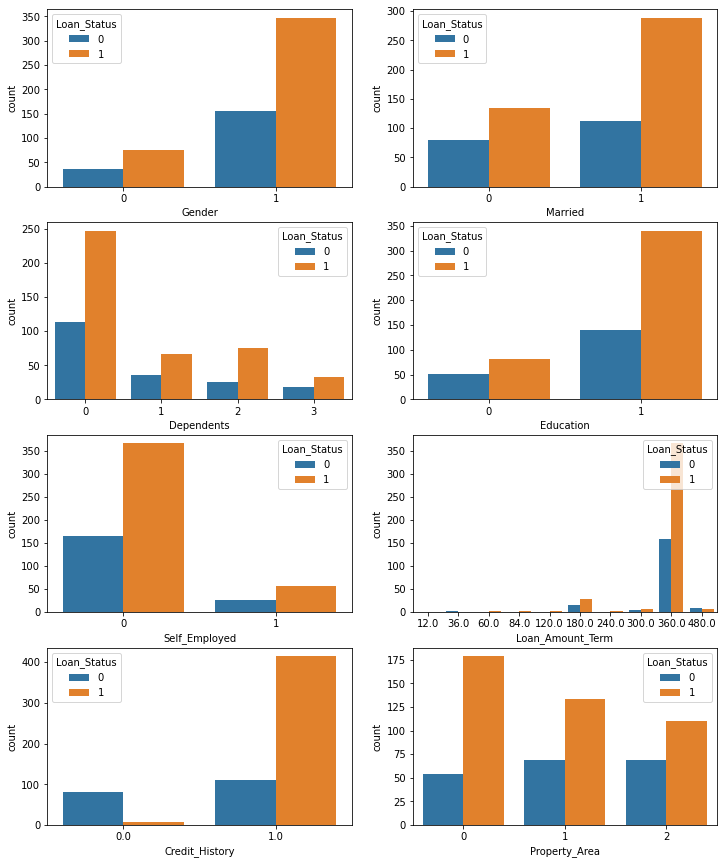

In [41]:
fig,ax=plt.subplots(4,2,figsize=(12,15))
sns.countplot(x='Gender',data=df_new,hue='Loan_Status',ax=ax[0,0])
sns.countplot(x='Married',data=df_new,hue='Loan_Status',ax=ax[0,1])
sns.countplot(x='Dependents',data=df_new,hue='Loan_Status',ax=ax[1,0])
sns.countplot(x='Education',data=df_new,hue='Loan_Status',ax=ax[1,1])
sns.countplot(x='Self_Employed',data=df_new,hue='Loan_Status',ax=ax[2,0])
sns.countplot(x='Loan_Amount_Term',data=df_new,hue='Loan_Status',ax=ax[2,1])
sns.countplot(x='Credit_History',data=df_new,hue='Loan_Status',ax=ax[3,0])
sns.countplot(x='Property_Area',data=df_new,hue='Loan_Status',ax=ax[3,1])
plt.show()

In [73]:
# separating the labels and features
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

In [45]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [47]:
# checking for best random state

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8594594594594595 on Random State:  8


In [48]:
# creating train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=8)

## RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,predrf)*100))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,target_names=target_names))

Accuracy Score: 83.78378378378379
[[ 30  22]
 [  8 125]]
              precision    recall  f1-score   support

     class 0       0.79      0.58      0.67        52
     class 1       0.85      0.94      0.89       133

    accuracy                           0.84       185
   macro avg       0.82      0.76      0.78       185
weighted avg       0.83      0.84      0.83       185



### K nearest neighbors

In [50]:
# By using K nearest neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predknn)*100))
target_names = ['class 0','class 1']
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn,target_names=target_names))

Accuracy Score: 84.32432432432432
[[ 30  22]
 [  7 126]]
              precision    recall  f1-score   support

     class 0       0.81      0.58      0.67        52
     class 1       0.85      0.95      0.90       133

    accuracy                           0.84       185
   macro avg       0.83      0.76      0.79       185
weighted avg       0.84      0.84      0.83       185



###  Naive Bayes

In [51]:
# By using Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test, predgnb)*100))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb,target_names=target_names))

Accuracy Score: 83.24324324324324
[[ 28  24]
 [  7 126]]
              precision    recall  f1-score   support

     class 0       0.80      0.54      0.64        52
     class 1       0.84      0.95      0.89       133

    accuracy                           0.83       185
   macro avg       0.82      0.74      0.77       185
weighted avg       0.83      0.83      0.82       185



## DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,preddt)*100))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt,target_names=target_names,))

Accuracy Score: 73.51351351351352
[[ 29  23]
 [ 26 107]]
              precision    recall  f1-score   support

     class 0       0.53      0.56      0.54        52
     class 1       0.82      0.80      0.81       133

    accuracy                           0.74       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.74      0.74      0.74       185



## LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,predlr)*100))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr,target_names=target_names,))

Accuracy Score: 85.94594594594595
[[ 28  24]
 [  2 131]]
              precision    recall  f1-score   support

     class 0       0.93      0.54      0.68        52
     class 1       0.85      0.98      0.91       133

    accuracy                           0.86       185
   macro avg       0.89      0.76      0.80       185
weighted avg       0.87      0.86      0.85       185



In [57]:
# checking cross validation score

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

maxx_acc = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    result = cv.mean()
    print('{}: {}'.format(name, result))
    if result > maxx_acc:
        maxx_acc = result
        b_model = name
print("The best model is {} with the accuracy {:.2f}".format(b_model, maxx_acc))

Naive Bayes: 0.7692137320044297
Decision Tree: 0.7156146179401993
Random Forest: 0.7761351052048726
KNN: 0.7482281284606865
LogisticRegression: 0.7832225913621262
The best model is LogisticRegression with the accuracy 0.78


### Hyper Parameter Tuning:-

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters={'penalty':['l1','l2','elasticnet','none'],
          'tol':np.arange(2,10)}

In [60]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [61]:
GCV.best_params_

{'penalty': 'l2', 'tol': 7}

In [63]:
mod=LogisticRegression(penalty='l2', tol=7)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.94594594594595


In [65]:
pred=lr.predict(x_test)
predictions=pd.DataFrame({'Predictions':pred,'Real Value':y_test})
predictions

,Predictions,Real Value
532,0,0
131,1,1
578,1,1
562,1,1
182,1,1
...,...,...
429,1,1
353,0,0
546,1,0
188,1,1


### Plotting ROC AUC curve

In [69]:
# predicting probabilities
pred_prob1 = gnb.predict_proba(x_test)
pred_prob2 = dt.predict_proba(x_test)
pred_prob3 = knn.predict_proba(x_test)
pred_prob4 = rf.predict_proba(x_test)
pred_prob5 = lr.predict_proba(x_test)

In [70]:
from sklearn.metrics import roc_curve

# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr=fpr
random_prob = [0 for i in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, random_prob, pos_label=1)

In [71]:
from sklearn.metrics import roc_auc_score

# auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4,auc_score5)

0.7638808559861191 0.6944765760555234 0.7450838635049162 0.8258386350491613 0.8205610179294389


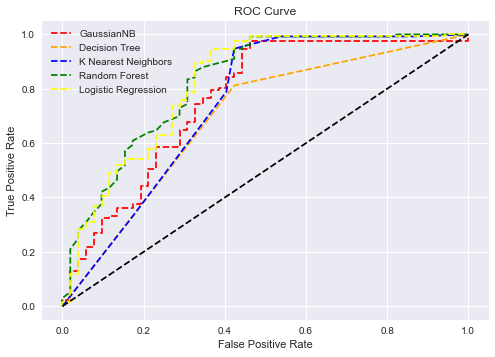

In [72]:
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr1, tpr1, linestyle='--', color='red', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--', color='orange', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='K Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--', color='green', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--', color='yellow', label='Logistic Regression')
plt.plot(fpr, tpr, linestyle='--', color='black')

#title
plt.title('ROC Curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

### Saving Our Model:-

In [67]:
import joblib
joblib.dump(lr,'Loanprediction.pk1')

['Loanprediction.pk1']

## Loading the Saved Model:-

In [68]:
save=joblib.load('Loanprediction.pk1')
prediction=save.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8594594594594595
[[ 28  24]
 [  2 131]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68        52
           1       0.85      0.98      0.91       133

    accuracy                           0.86       185
   macro avg       0.89      0.76      0.80       185
weighted avg       0.87      0.86      0.85       185

